In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data:

In [2]:
df = pd.read_csv("./all_changes_gt.csv.gz", index_col="Unnamed: 0")

In [3]:
print("Number of instances:", df.shape[0])

Number of instances: 2533


In [4]:
df.sample(5)

,project,revision_hash,committer_date,message,lines_added,lines_deleted,files_modified,num_hunks,current_CLOC_file,current_LOC_file,...,delta_PMD_MDBASBNC,delta_PMD_RSINC,delta_PMD_SEJBFSBF,delta_PMD_JUSS,delta_PMD_SBIWC,delta_Minor,delta_Major,delta_Critical,message_no_newlines,label
110251,struts,fab687a07e8d873c82465b29188100debf61097f,2016-02-15 12:28:01,fix patch WW-4558\n\ncontentType override igno...,3,3,1,3,0.0,542.0,...,0,0,0,0,0,0.0,0.0,0.0,fix patch WW-4558 contentType override ignore...,0
7409,cayenne,fe82b47e79f281dffec189039ce2e1e734c7c10f,2016-02-26 08:38:57,CAY-2051 | Applying new Reverse Engineering to...,2537,1440,76,217,0.0,14841.0,...,0,0,0,0,0,36.0,13.0,4.0,CAY-2051 | Applying new Reverse Engineering to...,0
4204,calcite,cdc1d960a2422d14dc7c25c856cb57103006f4a0,2017-03-14 16:39:54,[CALCITE-1683] Druid Specific Filter Transpose...,118,17,6,20,0.0,2488.0,...,0,0,0,0,0,4.0,0.0,0.0,[CALCITE-1683] Druid Specific Filter Transpose...,0
76937,mina-sshd,28a8ae258b08c6b41ab64ac25f2331168dc0415a,2013-12-03 20:32:11,SSHD-254 Suppress 'Authentication with partial...,1,1,1,1,0.0,669.0,...,0,0,0,0,0,0.0,0.0,0.0,SSHD-254 Suppress 'Authentication with partial...,2
24443,commons-lang,03645a1ec13a33d15d10270be759ddeaf9a5f7b5,2014-01-13 23:01:23,LANG-949 and LANG-950\n\n,61,29,2,20,0.0,1424.0,...,0,0,0,0,0,-1.0,0.0,0.0,LANG-949 and LANG-950,0


In [5]:
df.rename(columns={"revision_hash": "id", "message": "text"}, inplace=True)

### Clean the data:

In [6]:
print("Number of missing texts:", df["text"].isnull().sum())

Number of missing texts: 0


In [7]:
print("Number of missing labels:", df["label"].isnull().sum())

Number of missing labels: 0


In [8]:
print(f"Number of duplicated texts: {df["text"].duplicated().sum()} ({df["text"].duplicated().sum()/df.shape[0]:.2%})")

Number of duplicated texts: 57 (2.25%)


### Analyze distributions:

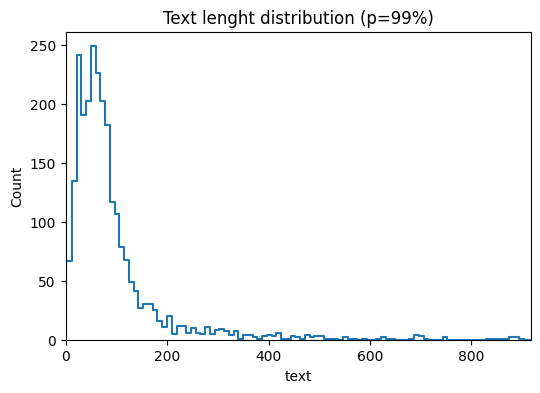

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(df["text"].str.len(), element="step", fill=False)
plt.xlim([0, df["text"].str.len().quantile(.99)])
plt.title("Text lenght distribution (p=99%)")
plt.show()

In [10]:
df["label"].value_counts(dropna=False, normalize=True).round(2)

label
1    0.40
0    0.33
2    0.27
Name: proportion, dtype: float64

- Perfective = 1
- Corrective = 2 
- Other = 0

### Persist datasets:

In [11]:
df[["id", "text", "label"]].to_parquet("./commit_intent.parquet", index=False)

In [12]:
print("Number of instances in the persisted dataset:", df.shape[0])

Number of instances in the persisted dataset: 2533
